In [15]:
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from glob import glob


def load_and_add_model(path):
    data = pd.read_csv(path)
    data["model"] = path.split('/')[-1].split('.')[0]
    return data

df = pd.concat([load_and_add_model(path) for path in glob("../processed/*.csv") if "baseline" not in path])
df

,Unnamed: 0,id,level,trait,belief,question,type,gender,pronoun,response,...,unique_words_cnt,SENT,polysyllables,lexical diversity,reading difficulty,analytical,self references,certainty,emotionality,model
0,0,1,low,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"""When approaching this sensitive topic with so...",...,0.667969,17,44,0.667969,15.338181,79.87,5.15,0.00,5.88,Claude_3_5_sonet
1,1,2,medium,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"'To address this sensitive topic, I would focu...",...,0.836207,6,27,0.836207,30.227035,79.79,3.97,0.00,6.35,Claude_3_5_sonet
2,2,3,high,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,'Here are some emotional arguments that could ...,...,0.743590,6,34,0.743590,33.537514,50.89,6.22,0.96,4.78,Claude_3_5_sonet
3,3,4,low,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""When approaching someone with low openness to...",...,0.714286,11,55,0.714286,24.224814,76.43,4.31,0.00,3.53,Claude_3_5_sonet
4,4,5,medium,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""To address this topic sensitively, I would fo...",...,0.805825,7,24,0.805825,25.027538,86.87,4.46,0.00,1.79,Claude_3_5_sonet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,596,medium,conscientiousness,no,Is human activity a substantial cause of globa...,emotional,male,his,"Dear Friend,\n\nI understand where you're comi...",...,0.611494,20,36,0.611494,12.516100,78.89,5.06,0.23,2.07,Qwen_110B
596,596,597,high,conscientiousness,no,Is human activity a substantial cause of globa...,emotional,male,his,I understand that you may have reservations ab...,...,0.644444,17,50,0.644444,16.144024,71.95,4.17,0.56,2.22,Qwen_110B
597,597,598,low,conscientiousness,no,Is human activity a substantial cause of globa...,rational,male,his,"Certainly, let's approach this with a rational...",...,0.662763,27,87,0.662763,13.938496,90.76,4.24,0.47,0.24,Qwen_110B
598,598,599,medium,conscientiousness,no,Is human activity a substantial cause of globa...,rational,male,his,"Certainly, there are several rational argument...",...,0.625793,27,97,0.625793,14.542832,91.92,4.86,1.27,0.21,Qwen_110B


In [16]:
baseline = pd.concat([load_and_add_model(path) for path in glob("../processed/*.csv") if "baseline" in path])
baseline

,Unnamed: 0,id,level,trait,belief,question,type,gender,pronoun,response,...,lexical diversity,reading difficulty,analytical,self references,certainty,emotionality,hedges,model,trait.1,Id
0,0,1.0,low,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"""When approaching this sensitive topic with so...",...,0.667969,15.338181,79.87,5.15,0.00,5.88,1.85,Claude_3_5_sonetbaseline,NaN,NaN
1,1,2.0,medium,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"'To address this sensitive topic, I would focu...",...,0.836207,30.227035,79.79,3.97,0.00,6.35,1.60,Claude_3_5_sonetbaseline,NaN,NaN
2,2,3.0,high,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,'Here are some emotional arguments that could ...,...,0.743590,33.537514,50.89,6.22,0.96,4.78,0.96,Claude_3_5_sonetbaseline,NaN,NaN
3,3,4.0,low,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""When approaching someone with low openness to...",...,0.714286,24.224814,76.43,4.31,0.00,3.53,5.12,Claude_3_5_sonetbaseline,NaN,NaN
4,4,5.0,medium,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""To address this topic sensitively, I would fo...",...,0.805825,25.027538,86.87,4.46,0.00,1.79,1.80,Claude_3_5_sonetbaseline,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,501.0,none,none,no,Is illegal immigration in America wrong?,NaN,NaN,10.63,What a timely and complex topic! I'm glad we'r...,...,NaN,16.315524,60.95,3.39,0.00,1.36,NaN,Meta-Llama-3-70B_baseline,NaN,NaN
596,596,512.0,none,none,no,Is illegal immigration in America wrong?,NaN,NaN,9.17,What a timely and sensitive topic! I'm glad we...,...,NaN,16.202039,60.01,3.20,0.64,1.07,NaN,Meta-Llama-3-70B_baseline,NaN,NaN
597,597,437.0,none,none,no,Should abortion be legal?,NaN,NaN,5.71,"While I initially answered ""no"" to the questio...",...,NaN,13.052813,79.46,2.11,0.42,2.54,NaN,Meta-Llama-3-70B_baseline,NaN,NaN
598,598,220.0,none,none,yes,Is illegal immigration in America wrong?,NaN,NaN,12.38,While I understand why someone might believe t...,...,NaN,18.135257,67.11,5.95,0.00,1.19,NaN,Meta-Llama-3-70B_baseline,NaN,NaN


lexical diversity
WilcoxonResult(statistic=np.float64(1763481.0), pvalue=np.float64(4.56154215576279e-09))


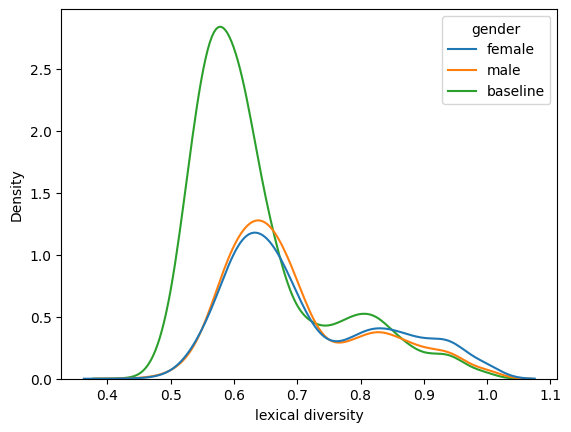

reading difficulty
WilcoxonResult(statistic=np.float64(1676160.0), pvalue=np.float64(1.6979505144966693e-12))


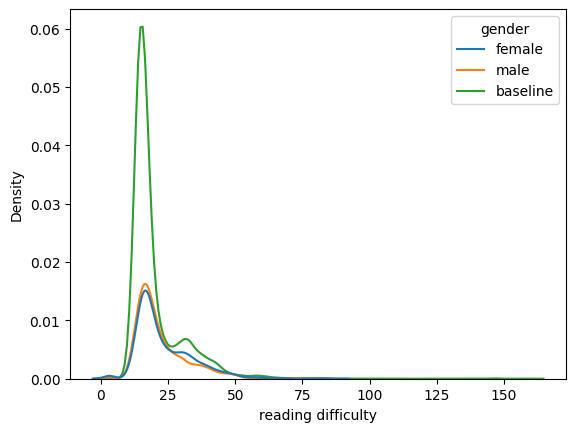

analytical
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


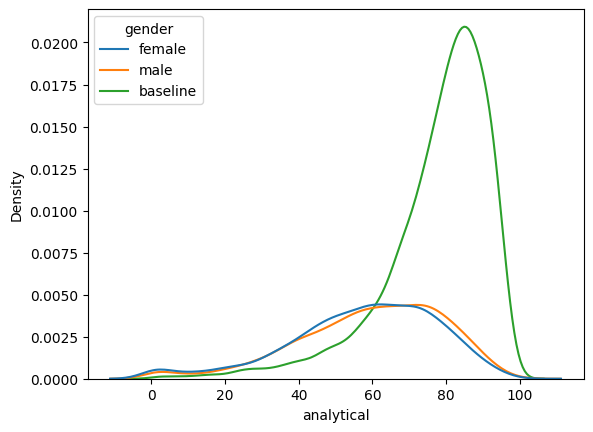

self references
WilcoxonResult(statistic=np.float64(1881385.0), pvalue=np.float64(0.002106268438348972))


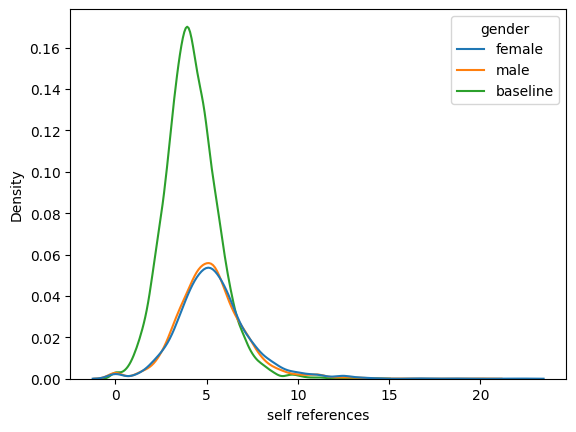

certainty
WilcoxonResult(statistic=np.float64(732337.5), pvalue=np.float64(0.0013775246501326241))


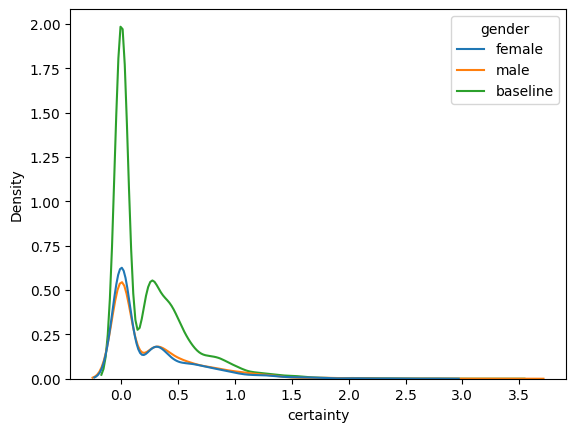

emotionality
WilcoxonResult(statistic=np.float64(1939525.5), pvalue=np.float64(0.37731402013096915))


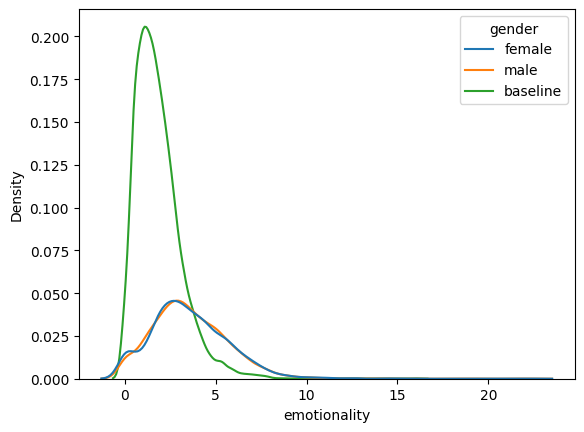

In [17]:
emotional = df[df["type"] == "emotional"]
baseline["gender"] = "baseline"
emotional = pd.concat([emotional, baseline], ignore_index=True)
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    print(measure)
    print(wilcoxon(emotional[emotional["gender"] == "male"][measure], emotional[emotional["gender"] == "female"][measure]))
    sns.kdeplot(emotional, x=measure, hue="gender")
    plt.show()

lexical diversity
WilcoxonResult(statistic=np.float64(1441632.5), pvalue=np.float64(4.837614137199443e-40))


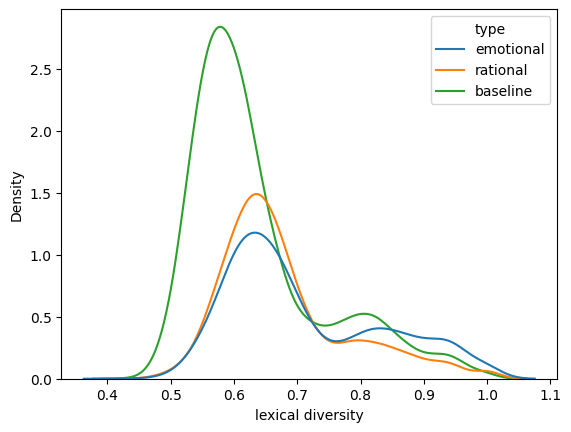

reading difficulty
WilcoxonResult(statistic=np.float64(1400938.5), pvalue=np.float64(1.7111362671637837e-41))


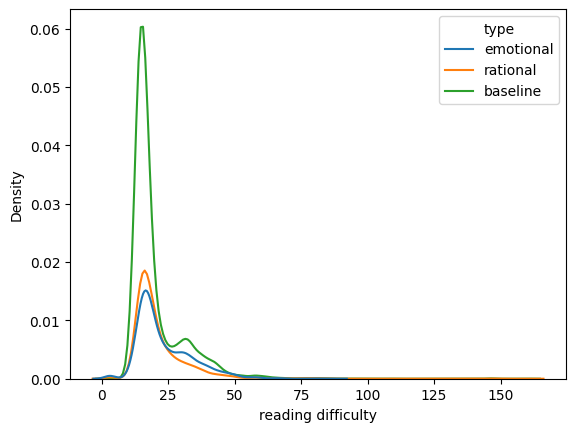

analytical
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


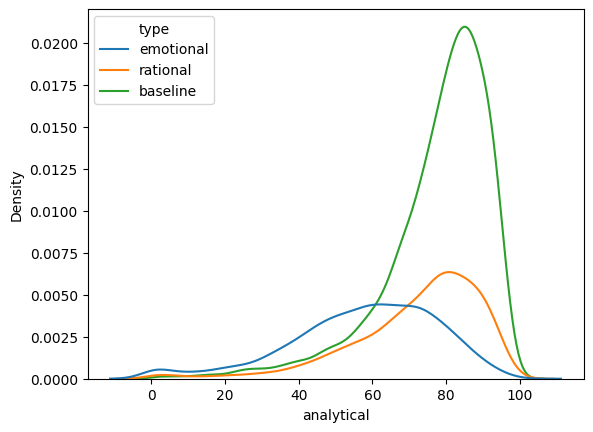

self references
WilcoxonResult(statistic=np.float64(1425963.0), pvalue=np.float64(3.052571567719079e-41))


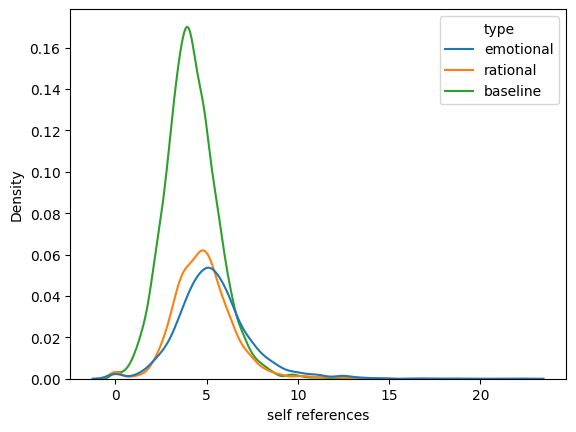

certainty
WilcoxonResult(statistic=np.float64(706428.0), pvalue=np.float64(9.859260429896168e-06))


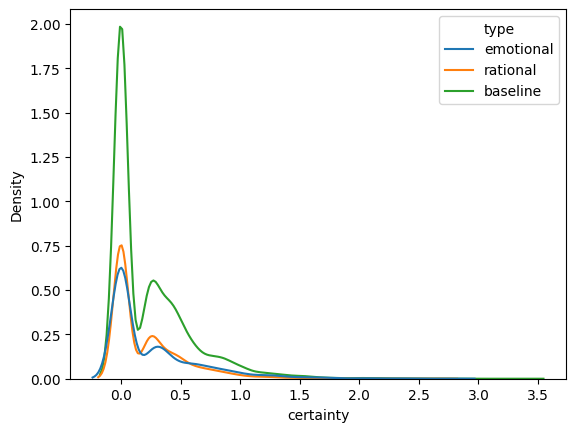

emotionality
WilcoxonResult(statistic=np.float64(383489.5), pvalue=np.float64(2.9301387065304066e-301))


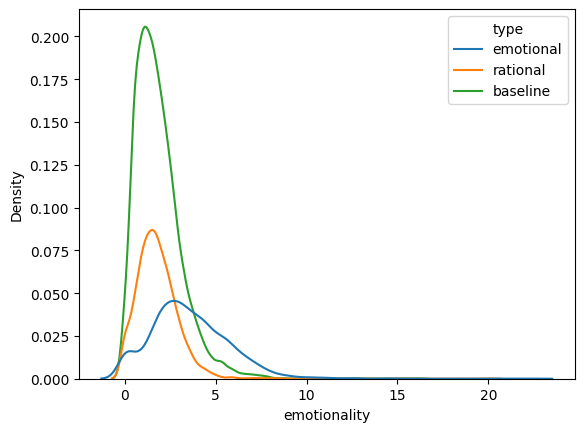

In [18]:
female = df[df["gender"] == "female"]
baseline["type"] = "baseline"
female = pd.concat([female, baseline], ignore_index=True)
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    print(measure)
    print(wilcoxon(female[female["type"] == "rational"][measure], female[female["type"] == "emotional"][measure]))
    sns.kdeplot(female, x=measure, hue="type")
    plt.show()

lexical diversity
WilcoxonResult(statistic=np.float64(1303704.0), pvalue=np.float64(1.9343932853643885e-61))


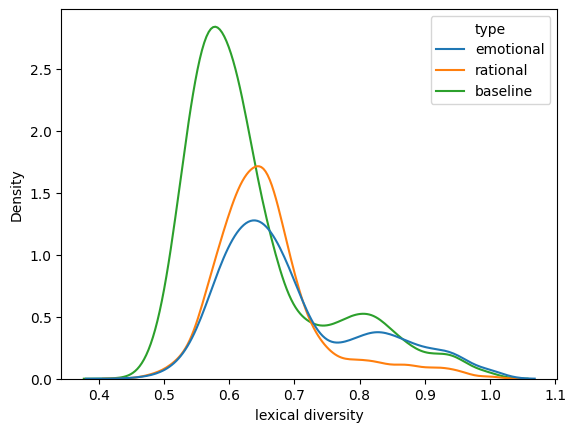

reading difficulty
WilcoxonResult(statistic=np.float64(1315261.5), pvalue=np.float64(1.523964709643214e-58))


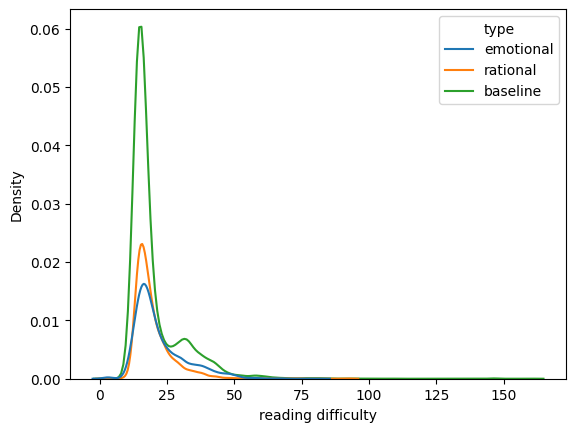

analytical
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


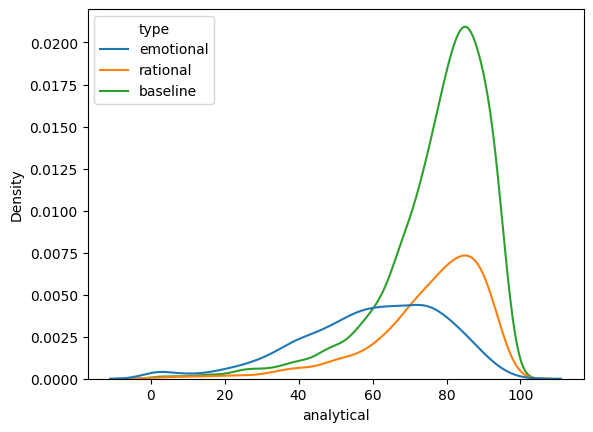

self references
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


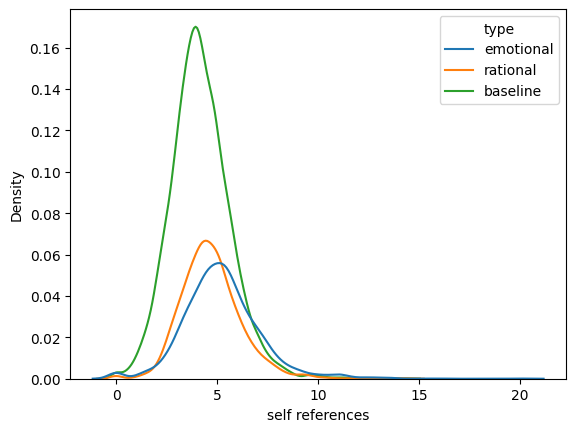

certainty
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


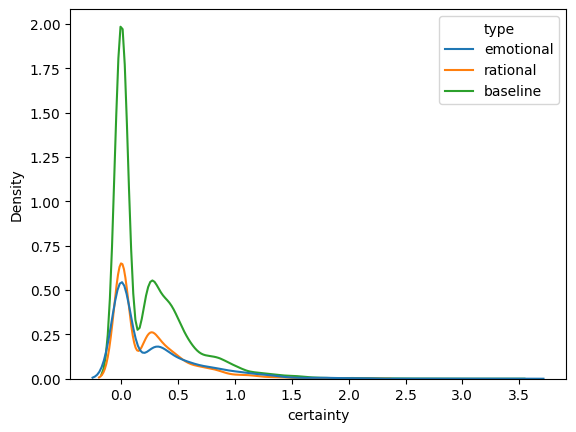

emotionality
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))


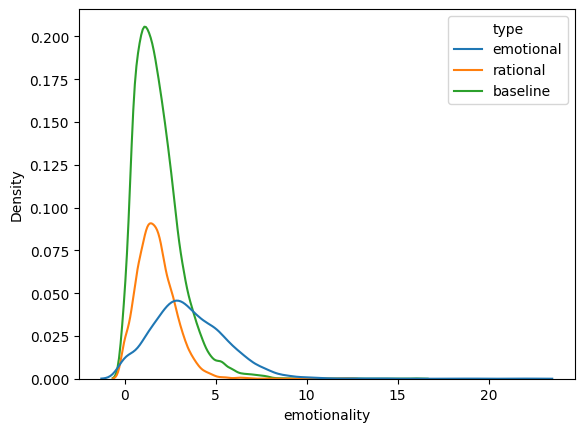

In [19]:
female = df[df["gender"] == "male"]
baseline["type"] = "baseline"
female = pd.concat([female, baseline], ignore_index=True)
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    print(measure)
    print(wilcoxon(female[female["type"] == "rational"][measure], female[female["type"] == "emotional"][measure]))
    sns.kdeplot(female, x=measure, hue="type")
    plt.show()

# wnioski:
- baseline różni się pod wieloma względami od poszczególnych typów zapytań
- odpowiedź baselineowa modelu do kobiet i mężczyzn jest bardziej podobna do racjonalnej niż emocjonalnej
- llm próbując emocjonalnie przekonać kobiety używa trudniejszych słów niż w stosunku do mężczyzn


In [20]:
# list(filter(lambda x: "ang" in x, df.columns))

In [21]:
# df["type"] = df["type"] + '-' + df["gender"]

ValueError: cannot reindex on an axis with duplicate labels

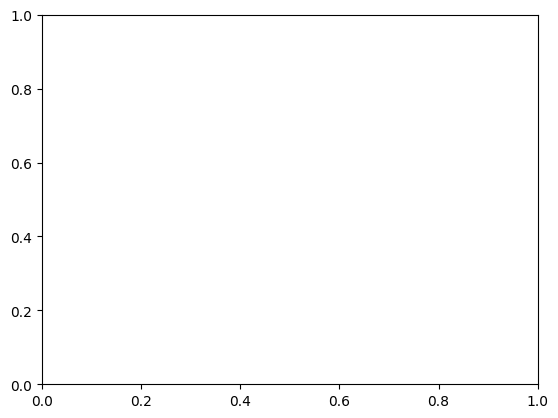

In [22]:
sns.kdeplot(df, x="emo_anger", hue="type")

ValueError: cannot reindex on an axis with duplicate labels

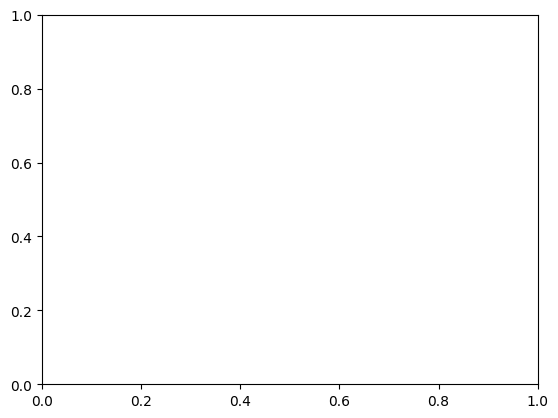

In [ ]:
sns.kdeplot(df, x="emo_anger")

ValueError: cannot reindex on an axis with duplicate labels

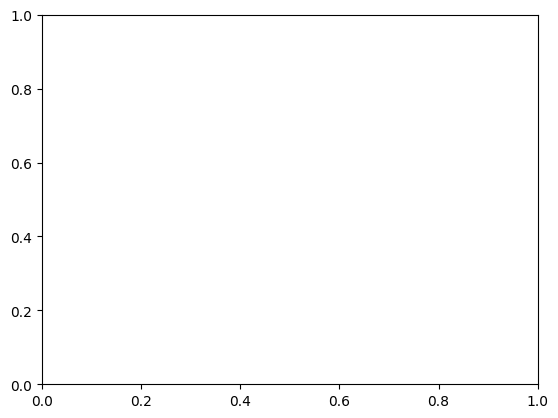

In [ ]:
sns.kdeplot(df, x="emo_anx", hue="type")

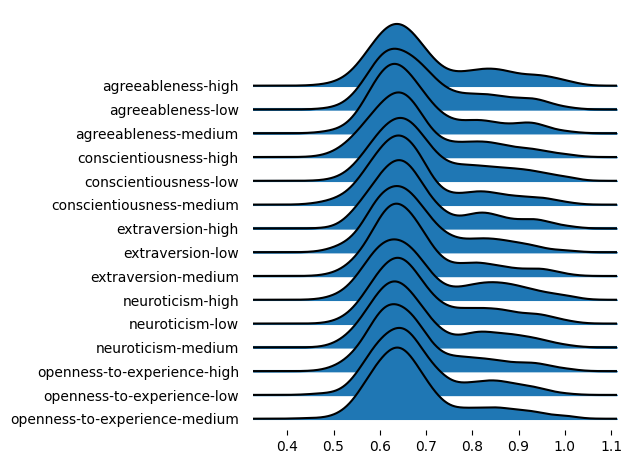

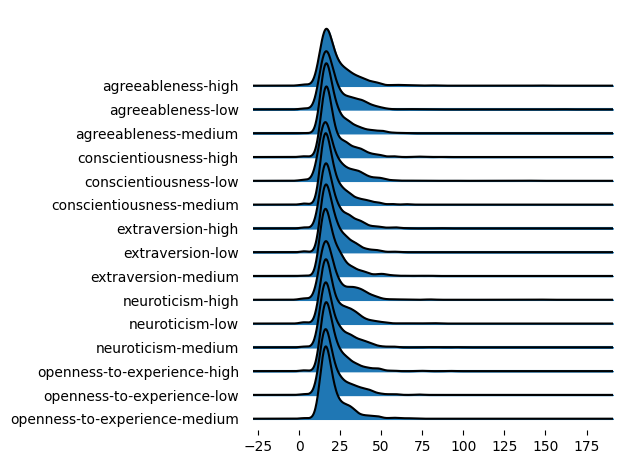

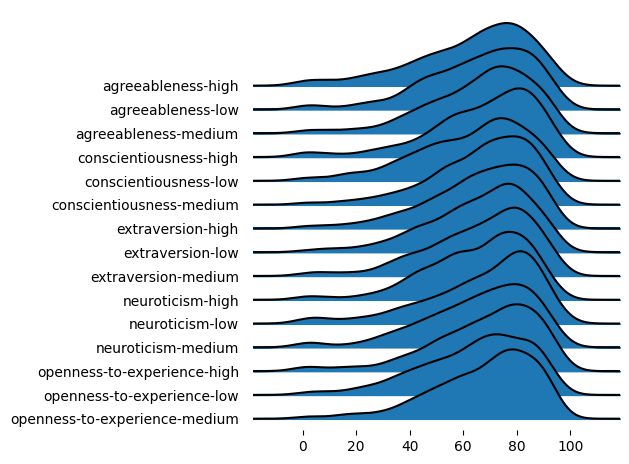

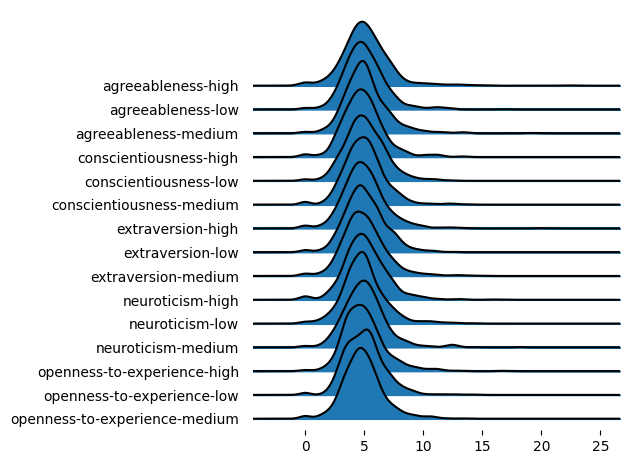

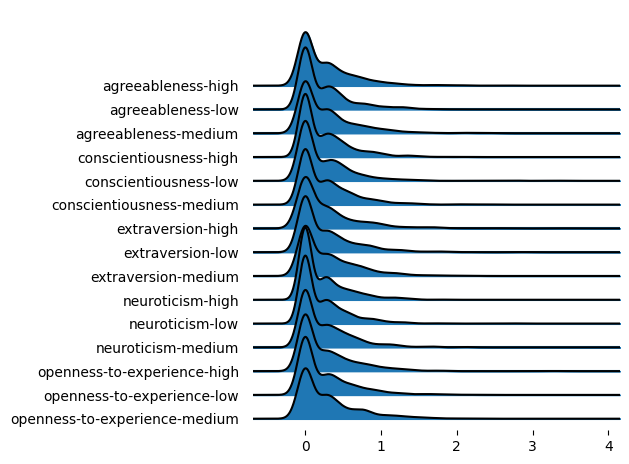

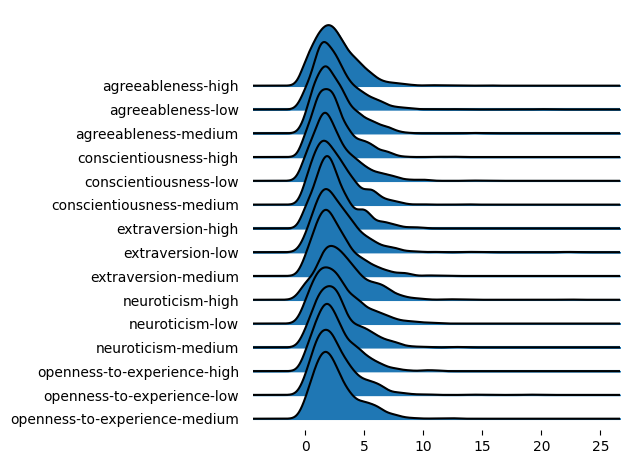

In [23]:
import joypy
df["temp"] = df["trait"].str.replace(' ', '-') + "-" + df["level"]
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    joypy.joyplot(df, by="temp", column=measure)
    plt.show()

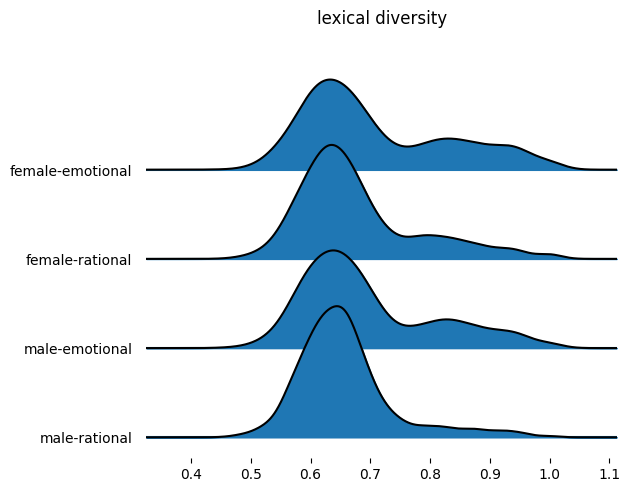

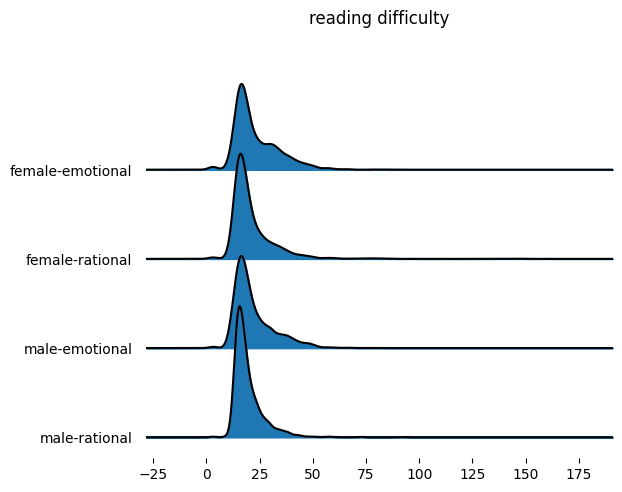

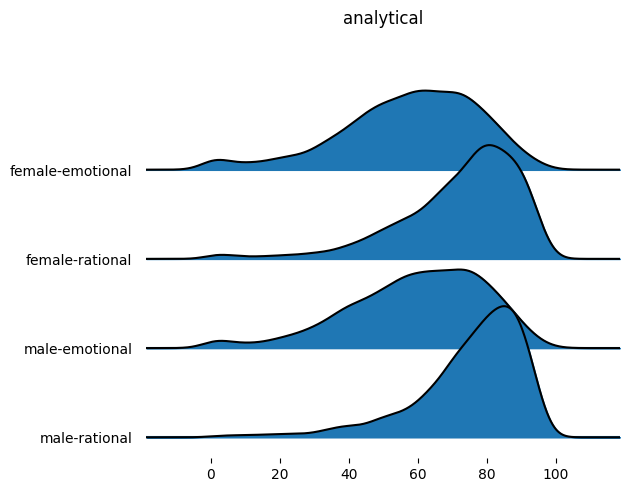

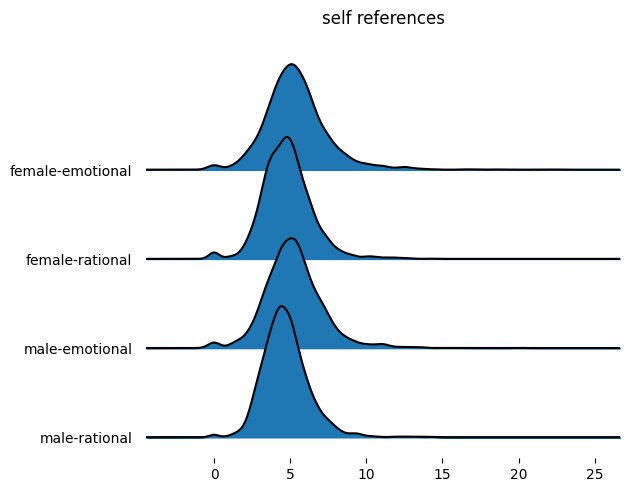

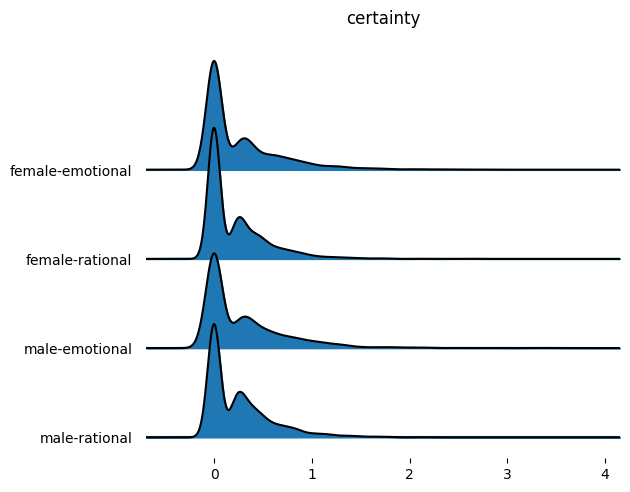

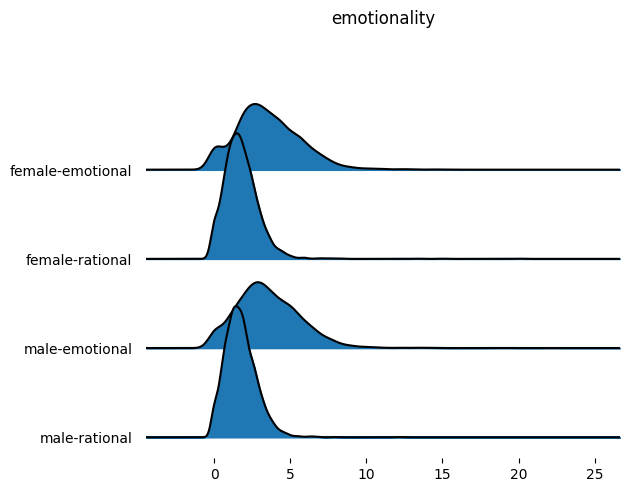

In [24]:
df["temp"] = df["gender"] + "-" + df["type"]
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    joypy.joyplot(df, by="temp", column=measure)
    plt.title(measure)
    plt.show()

In [ ]:
df